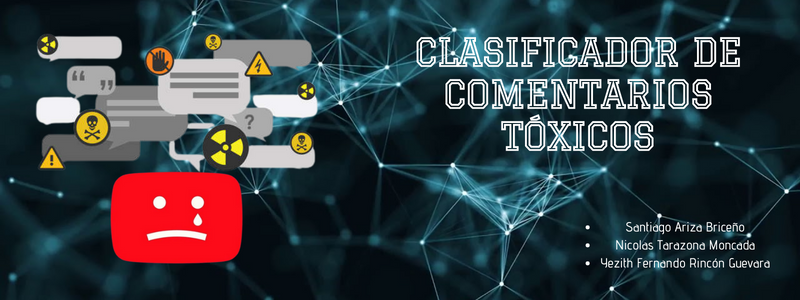

#***CLASIFICADOR DE COMENTARIOS TÓXICOS***
---

\\
###**AUTORES**

>Santiago Ariza Briceño - 2183223 - **GRUPO J1**

> Yezith Fernando Rincón Guevara - 2181686 **GRUPO J1**

> Nicolas Tarazona Moncada - 2182692 - **GRUPO J1**

\\

###**PROBLEMÁTICA**
> Es muy común en cualquier video encontrar comentarios toxicos que no aportan ningún tipo de valor adicional en la plataforma de youtube, es por eso que realizamos este clasificador de comentarios, donde posteriormente, ya clasificados los toxicos de los no toxicos, podrán manipularse, censurarse, o tomar alguna acción correctiva por parte de youtube con sus politicas de leyes.
###**OBJETIVO**
> Entrenar un modelo de clasificación para determinar si un comentario es o no tóxico usando como datos comentarios de usuarios de la plataforma YouTube.

\\
###**DATASET**
>El dataset que fue utilizado se encuentra en el siguiente link: https://www.kaggle.com/datasets/reihanenamdari/youtube-toxicity-data

\\
###**MODELOS**
>Para el desarrollo del proyecto, fueron usados los siguientes modelos para realizar la clasificación de los comentarios: 

* Naive Gaussian Bayes
* Decision Tree Classifier
* Random Forest Classifier
* Support Vector Machine
* Redes Neuronales



\\
###**PRESENTACIÓN**
>En el siguente link se encuentra la presentación del proyecto en formato de diapositivas: https://github.com/Deathyex/Proyecto_IA/blob/5daca15279de4b6deda87bb7dcc111107242ddcf/Slides_Proyecto_IA.pdf

\\
###**VÍDEO**
>En el siguiente link se encuentra el vídeo relacionado con el desarrollo del proyecto: https://youtu.be/Cvx3iPZooGk

\\


In [ ]:
#@title **Cargando Librerías** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
#@title **Montando el drive** { display-mode: "form"}
import os
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/'
os.chdir(path)

Mounted at /content/drive


In [ ]:
#@title **Carga del dataset** { display-mode: "form"}
data = pd.read_csv("Proyecto_IA1/youtoxic_english_1000.csv")
print(data.shape)
data.head()


(1000, 15)


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


#**Pre-Procesamiento de datos**

In [ ]:
#@title **Se codifican los valores 'False' y 'True' del dataset a '0' y '1' respectivamente** { display-mode: "form"}

data["IsToxic"] = data["IsToxic"].replace({False:0, True:1})
data["IsAbusive"] = data["IsAbusive"].replace({False:0, True:1}) 
data["IsThreat"] = data["IsThreat"].replace({False:0, True:1})
data["IsProvocative"] = data["IsProvocative"].replace({False:0, True:1})
data["IsObscene"] = data["IsObscene"].replace({False:0, True:1})
data["IsHatespeech"] = data["IsHatespeech"].replace({False:0, True:1})
data["IsRacist"] = data["IsRacist"].replace({False:0, True:1})
data["IsNationalist"] = data["IsNationalist"].replace({False:0, True:1})
data["IsSexist"] = data["IsSexist"].replace({False:0, True:1})
data["IsHomophobic"] = data["IsHomophobic"].replace({False:0, True:1})
data["IsReligiousHate"] = data["IsReligiousHate"].replace({False:0, True:1})
data["IsRadicalism"] = data["IsRadicalism"].replace({False:0, True:1})

data.head(5)


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0,0,0
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0,0,0


###**Limpieza de comentarios**

In [ ]:
#Se crea una lista con los caracteres que se desean eliminar de los comentarios
signos = ['\n', '\xa0', ',', '.', '?', '¿', '!', '@', '$', '(', ')', ':', ';', '/', '%', '#', '"', "'"] 
comentarios = []

#Se recorren uno por uno los comentarios y para cada uno se realiza
#la eliminación de caracteres, paso a minúsculas y separacion de palabras
for coment in data["Text"]:

  for s in signos:
    coment = coment.replace(s, ' ')

  coment = coment.lower()
  coment = coment.split(' ')
  coment = [c for c in coment if c != '']
  comentarios.append(coment)

print(comentarios)  

[['if', 'only', 'people', 'would', 'just', 'take', 'a', 'step', 'back', 'and', 'not', 'make', 'this', 'case', 'about', 'them', 'because', 'it', 'wasn', 't', 'about', 'anyone', 'except', 'the', 'two', 'people', 'in', 'that', 'situation', 'to', 'lump', 'yourself', 'into', 'this', 'mess', 'and', 'take', 'matters', 'into', 'your', 'own', 'hands', 'makes', 'these', 'kinds', 'of', 'protests', 'selfish', 'and', 'without', 'rational', 'thought', 'and', 'investigation', 'the', 'guy', 'in', 'this', 'video', 'is', 'heavily', 'emotional', 'and', 'hyped', 'up', 'and', 'wants', 'to', 'be', 'heard', 'and', 'when', 'he', 'gets', 'heard', 'he', 'just', 'presses', 'more', 'and', 'more', 'he', 'was', 'never', 'out', 'to', 'have', 'a', 'reasonable', 'discussion', 'kudos', 'to', 'the', 'smerconish', 'for', 'keeping', 'level', 'the', 'whole', 'time', 'and', 'letting', 'masri', 'make', 'himself', 'out', 'to', 'be', 'a', 'fool', 'how', 'dare', 'he', 'and', 'those', 'that', 'tore', 'that', 'city', 'down', 'in'

In [ ]:
#Se mapean las palabras agregandolas a un diccionario y asignandoles un valor aleatorio
import random

map_palabras = {}

for x in comentarios:
  for y in x:
    if y not in map_palabras:
      map_palabras[y] = random.randint(1000, 9999)

print(map_palabras)

{'if': 4934, 'only': 8698, 'people': 6996, 'would': 7986, 'just': 4844, 'take': 4080, 'a': 6213, 'step': 1868, 'back': 6157, 'and': 6119, 'not': 8828, 'make': 9063, 'this': 9715, 'case': 6898, 'about': 5034, 'them': 2921, 'because': 4537, 'it': 7564, 'wasn': 5659, 't': 8563, 'anyone': 1682, 'except': 9145, 'the': 1221, 'two': 6905, 'in': 4396, 'that': 5161, 'situation': 6453, 'to': 1132, 'lump': 6302, 'yourself': 5020, 'into': 3708, 'mess': 4889, 'matters': 4371, 'your': 2735, 'own': 9751, 'hands': 2512, 'makes': 4665, 'these': 2892, 'kinds': 3082, 'of': 8598, 'protests': 7592, 'selfish': 2714, 'without': 6357, 'rational': 2442, 'thought': 3426, 'investigation': 3446, 'guy': 5824, 'video': 9416, 'is': 8793, 'heavily': 4042, 'emotional': 1691, 'hyped': 8190, 'up': 3506, 'wants': 7101, 'be': 8793, 'heard': 3380, 'when': 6118, 'he': 3491, 'gets': 7555, 'presses': 6207, 'more': 4330, 'was': 3101, 'never': 3020, 'out': 4109, 'have': 2292, 'reasonable': 1162, 'discussion': 1261, 'kudos': 137

In [ ]:
#Se crea el dataframe con los datos limpios y se reemplazan las palabras por su equivalente numérico
#Para las columnas con valores NaN se reemplazan con 0
X = pd.DataFrame(comentarios)
X = X.replace(map_palabras)
X = X.fillna(0)
X = X.astype(int)
y = data.IsToxic
X.head(5)


,0,1,2,3,4,5,6,7,8,9,...,810,811,812,813,814,815,816,817,818,819
0,4934,8698,6996,7986,4844,4080,6213,1868,6157,6119,...,0,0,0,0,0,0,0,0,0,0
1,2094,7596,8793,8828,5280,1132,1985,1132,8993,5925,...,0,0,0,0,0,0,0,0,0,0
2,1205,3940,8641,2921,3262,4083,5372,3232,4826,2375,...,0,0,0,0,0,0,0,0,0,0
3,6915,3719,6213,8820,5001,9198,8598,6996,2349,4060,...,0,0,0,0,0,0,0,0,0,0
4,1221,3390,5479,8793,7728,6205,3491,3368,2292,8828,...,0,0,0,0,0,0,0,0,0,0


#**MÉTODOS DE CLASIFICACIÓN**

##**Naive Gaussian Bayes**

In [ ]:


from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

est = GaussianNB()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.5066666666666667


##**DecisionTreeClassifier**




In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


dtc = DecisionTreeClassifier(max_depth=16,random_state = 25)
dtc.fit(X_train,y_train)
print(accuracy_score(dtc.predict(X_test), y_test))



#CrossValidation 


s = cross_val_score(dtc, X, y, cv=KFold(8, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

0.505
accuracy 0.515 (+/- 0.04019)


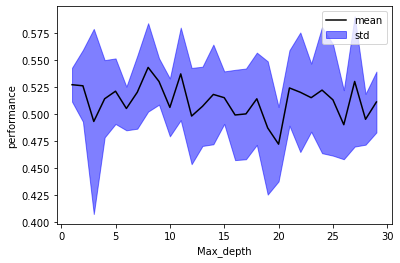

In [ ]:
from pandas.core.common import random_state
#DTC Maxdepth
def show_curve():
    means, stds = [], []
    max_range = range(1,30)
    
    
    for maxd in max_range:
        est = DecisionTreeClassifier(max_depth=maxd, random_state = 25)
        s = cross_val_score(est, X, y, cv=KFold(8, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_range, means, label="mean", color="black")
    plt.fill_between(max_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("Max_depth")
    plt.ylabel("performance")
    plt.legend()

show_curve()

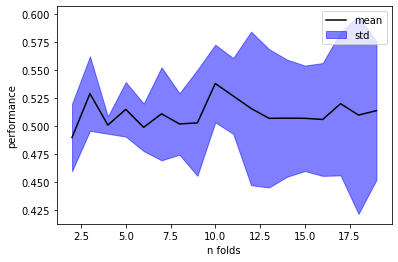

In [ ]:
#DTC tunning cross
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,20)
    for nfolds in nfolds_range:
       
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_curve(dtc)

##**RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

rfc = RandomForestClassifier(max_depth=36, n_estimators=86, random_state=25)
rfc.fit(X_train, y_train)
print(accuracy_score(rfc.predict(X_test), y_test))
s = cross_val_score(rfc, X, y, cv=KFold(8, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

0.545
accuracy 0.516 (+/- 0.04233)


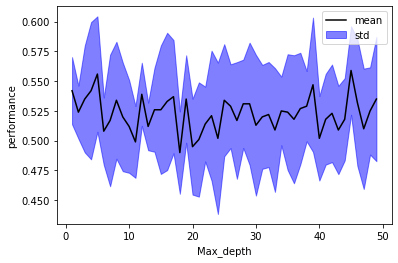

In [ ]:
#Tunning RFC
def show_curve():
    means, stds = [], []
    max_range = range(1,50)
    
    
    for maxd in max_range:
        est =  RandomForestClassifier(max_depth=maxd, n_estimators=10, random_state=25)
        s = cross_val_score(est, X, y, cv=KFold(8, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_range, means, label="mean", color="black")
    plt.fill_between(max_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("Max_depth")
    plt.ylabel("performance")
    plt.legend()

show_curve()

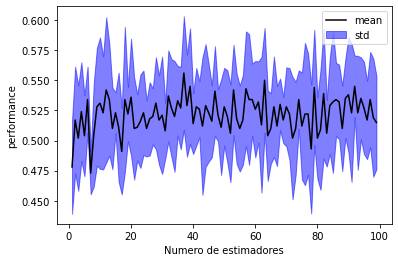

In [ ]:
#Tunning numero de estimadores

def show_curve():
    means, stds = [], []
    max_range = range(1,100)
    
    
    for maxd in max_range:
        est =  RandomForestClassifier(max_depth=36, n_estimators=maxd, random_state=25)
        s = cross_val_score(est, X, y, cv=KFold(8, shuffle=True), scoring=make_scorer(accuracy_score))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_range, means, label="mean", color="black")
    plt.fill_between(max_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("Numero de estimadores")
    plt.ylabel("performance")
    plt.legend()

show_curve()

##**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf")
svc.fit(X_train,y_train)
print(accuracy_score(svc.predict(X_test), y_test))

0.555


##**REDES NEURONALES**

###**DNN**

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
25/25 [==============================] - 1s 10ms/step - loss: 0.7722 - accuracy: 0.5063
Epoch 2/40
25/25 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.5800
Epoch 3/40
25/25 [==============================] - 0s 9ms/step - loss: 0.6636 - accuracy: 0.5913
Epoch 4/40
25/25 [==============================] - 0s 9ms/step - loss: 0.6619 - accuracy: 0.5938
Epoch 5/40
25/25 [==============================] - 0s 9ms/step - loss: 0.6475 - accuracy: 0.5938
Epoch 6/40
25/25 [==============================] - 0s 10ms/step - loss: 0.6522 - accuracy: 0.6162
Epoch 7/40
25/25 [==============================] - 0s 9ms/step - loss: 0.6510 - accuracy: 0.6125
Epoch 8/40
25/25 [==============================] - 0s 10ms/step - loss: 0.6360 - accuracy: 0.6313
Epoch 9/40
25/25 [==============================] - 0s 9ms/step - loss: 0.6299 - accuracy: 0.6350
Epoch 10/40
25/25 [==============================] - 0s 10ms/step - loss: 0.6185 - accuracy: 0.6475
Epoch 11/40
25

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 4ms/step - loss: 0.9337 - accuracy: 0.5250
Test accuracy: 0.5249999761581421


#**PCA para reducir la dimensionalidad**

In [ ]:
from sklearn.decomposition import PCA

#Reducción de dimensionalidad de 820 a 500
Xpca = PCA(n_components=500).fit_transform(X)
Xpca_train, Xpca_test, y_train, y_test = train_test_split(Xpca, y, test_size=0.3, random_state=25)

In [ ]:
#Random forest con los datos transformados
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

rfc = RandomForestClassifier(max_depth=80, n_estimators=100, random_state=25)
rfc.fit(Xpca_train, y_train)
print(accuracy_score(rfc.predict(Xpca_test), y_test))
s = cross_val_score(rfc, Xpca, y, cv=KFold(8, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

0.52
accuracy 0.543 (+/- 0.04204)


In [ ]:
#DNN con los datos transformados
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.tanh),
    tf.keras.layers.Dense(128, activation=tf.nn.tanh),
    tf.keras.layers.Dense(64, activation=tf.nn.tanh),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Xpca_train, y_train, epochs=20)

test_loss, test_acc = model.evaluate(Xpca_test, y_test)

print('Test accuracy:', test_acc)

Epoch 1/20
22/22 [==============================] - 0s 6ms/step - loss: 0.7920 - accuracy: 0.4971
Epoch 2/20
22/22 [==============================] - 0s 10ms/step - loss: 0.6304 - accuracy: 0.6429
Epoch 3/20
22/22 [==============================] - 0s 9ms/step - loss: 0.5754 - accuracy: 0.7171
Epoch 4/20
22/22 [==============================] - 0s 9ms/step - loss: 0.5204 - accuracy: 0.7786
Epoch 5/20
22/22 [==============================] - 0s 9ms/step - loss: 0.5077 - accuracy: 0.7514
Epoch 6/20
22/22 [==============================] - 0s 9ms/step - loss: 0.4578 - accuracy: 0.8129
Epoch 7/20
22/22 [==============================] - 0s 10ms/step - loss: 0.4223 - accuracy: 0.8286
Epoch 8/20
22/22 [==============================] - 0s 9ms/step - loss: 0.3854 - accuracy: 0.8643
Epoch 9/20
22/22 [==============================] - 0s 9ms/step - loss: 0.3697 - accuracy: 0.8471
Epoch 10/20
22/22 [==============================] - 0s 9ms/step - loss: 0.3203 - accuracy: 0.8943
Epoch 11/20
22/22